In [107]:
#Program to implement a half adder 
from qiskit import *

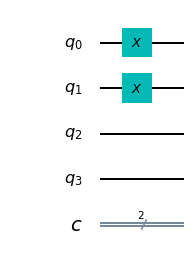

In [108]:
#Initialising the circuit
qc=QuantumCircuit(4,2) #4 qubits-2 inputs, one for sum and one for the carry. 2 classical bits to store the measurement results.
qc.x(0) #Uncomment to make the first input=1
qc.x(1) #Uncomment to make the second input=1
qc.draw(output='mpl')

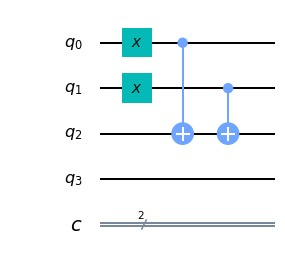

In [109]:
#Sum=q_0 XOR q_1, implemented using two cnots as one cnot would lead to overwriting on one of the inputs
#qc.cx(1,2)
qc.cx(0,2)
qc.cx(1,2)
#The third qubit now has the value for the sum.
qc.draw(output='mpl')


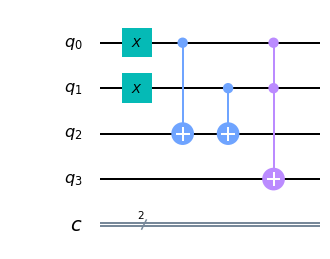

In [110]:
#Carry=q_0 AND q_1(1 when both inputs are 1). This is indirectly implemented using the toffoli gate.
qc.ccx(0,1,3) #Toffoli gate writes the and of the two inputs into q_2.
qc.draw(output='mpl')

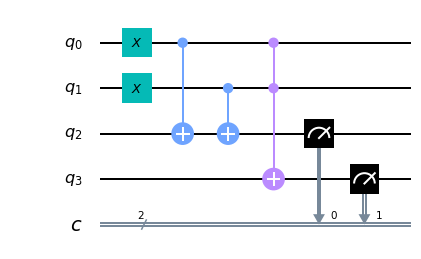

In [111]:
#Performing a measurement on q_2(sum) and q_3(carry) to extract the results
qc.measure(2,0) #To store the measurement result in bit 0
qc.measure(3,1) #To store the measurement result in bit 1
qc.draw(output='mpl')

In [112]:
#Executing the results on a simulated quantum device.
backend_req=Aer.get_backend('qasm_simulator')
job_req=execute(qc,backend_req)

In [113]:
#Extracting the results
hist=job_req.result().get_counts()
print(hist)
#in qiskit, bits in a string are numbered from right to left. Hence the rightmost bit is q_2(sum) and leftmost is q_3(carry).

{'10': 1024}


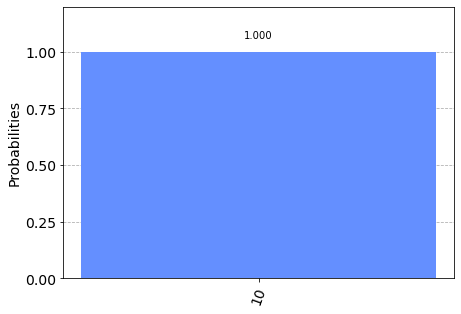

In [114]:
#Plotting the results
from qiskit.visualization import plot_histogram
plot_histogram(hist)